# Applications of Central Limit Theorem
Michelle Yaochai | Zheng Chong, Emily | Marvin Dragon Choo | Brian Ku\
01 Apr 2022

## Introduction
We explore the Central Limit Theorem (CLT) and their applications in this notebook.

* In Part A, we define and illustrate CLT using examples such as coin flips and rolling a fair dice. We also show how to use CLT to calculate population parameters from samples, as well as situations where CLT fails.
* In Part B, we demonstrate the utility of CLT by simulating various physical systems, and validating key parameters against those predicted by CLT. We will be exploring the random walk in relation to CLT and other interesting applications.

The following modules will be used in this notebook, each of which will be introduced as they are used.

In [4]:
# Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

## Part A: Illustration

### Motivation

The Central Limit Theorem is one of the most fundamental theorems in the field of statistics, and it has important and wide-ranging application to other fields. We often find ourselves dealing with large numbers of variables.

For example, within the population of NUS students, we might want to know the distribution of the number of hours of sleep per day. Instead of collecting the data from every single NUS student (a *census*), we like to, statistically-speaking, collect *samples*. Ideally, we would do probability sampling and collect random samples of about 30 students. 

For the first sample of 30 students, their "number of hours of sleep" distribution might look something like this.

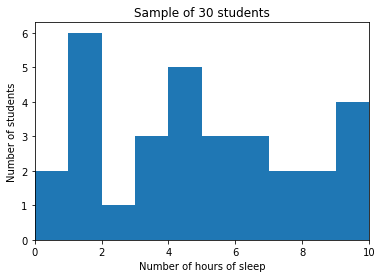

In [5]:
# A completely arbitrary sample
y = []
for _ in range(31):    
    n = np.random.randint(0,11)
    y.append(n)

plt.hist(y)
plt.xlabel('Number of hours of sleep')
plt.ylabel('Number of students')
plt.title('Sample of 30 students')
plt.xlim([0,10])
plt.show()

Clearly, the chance of getting a normal distribution is very small. But when we take the means of more and more samples, and plot the mean number of hours of sleep, the **sampling distribution of sample means will begin to look more and more like a normal curve**.

This is the idea known as the Central Limit Theorem - which will be extremely useful as we can use properties of the Normal distribution to predict population parameters. In the example above, we would be able to estimate the mean number of hours of sleep for the population of NUS students by approximating the sampling distribution to a Normal distribution.

### Definition
Here, we give a common definition of Central Limit Theorem (CLT):

> The distribution of sample means approximates a normal distribution as the sample size gets larger, even if the population is not normally distributed.

This definition is certainly not the most mathematically rigorous, but is sufficient for the scope of the project. There are also additional restrictions necessary for CLT, and they will be introduced as appropriate.

We now illustrate the assertion that CLT is trying to make using coin flips. Consider the act of flipping a fair coin.
* Since the coin is fair, there is an equal probability $p=0.5$ of it landing on heads or tails.
* Assign the outcome of tails as 0, and heads as 1.

This system is equivalently represented by a binomial distribution (since there are only two outcomes) with probability of success (of getting heads) of 0.5.

To begin, let's see what happens when we flip the coin 100 times. Since this is a binomial distribution, we can make use of ```numpy.random.binomial``` to simulate these coin flips.

Out of 100 coin flips, there were 45 heads and 55 tails.


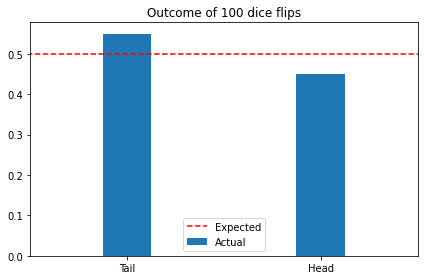

In [6]:
n = 100
p = 0.5

# Labels
flip_outcomes = ['Tail', 'Head']

# Data
# Count the number of heads after flipping a coin n times, each with probability p of landing on heads.
num_heads = np.random.binomial(n=n,p=p)
# 
num_tails = n - num_heads

# Show outcome
print(f'Out of {n} coin flips, there were {num_heads} heads and {num_tails} tails.')

# Plot
# Expected
plt.bar(flip_outcomes, [num_tails/n, num_heads/n], width=0.25, label='Actual')
# Actual
plt.hlines(y=0.5, xmin=-0.6, xmax=1.6, linestyles='--',
           colors='red', label='Expected')

# Customize and Show
plt.xlim([-0.5, 1.5])
plt.title(f'Outcome of {n} dice flips')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()


If asked to predict the number of heads, it is probably *instinctive* to expect 50 of each, after all, we expect an equal number of heads and tails.

Most of the time, we get a number that *feels* close to, but not exactly 50. Try running the above cell multiple times! Here, we take this opportunity to explain more key terms.

* Each time you execute the cell, you generate one **sample** of 100 coin flips.
* The **sample size $n$** is the number of independent coin flips that were performed. Here, it is 100.
* The direct output of each sample, which is a number between 0 and 100, is the total number of heads in that sample.

### Sampling Distribution
Now that you've run the cell multiple times, you can see that each time you run it, you get a different result. Even though the coin is the same, there is still some variability between the different samples collected from this 'population'.

Yet, it is not equally likely to obtain each outcome. Using a sample size of 100, it *feels* more probable to observe a sample with 40 heads, than that of 10 heads, which feels more extreme. We can visualize this probability by simulating many independent samples, and observing the distribution of the number of heads, using a histogram.
* This is what *'distribution of sample means'* in the definition of CLT is referring to.

Surprisingly, generating this data can be done in one line of code, again using ```numpy.random.binomial```. In particular, we vary the sample sizes and observe the impact on the subsequent distribution.

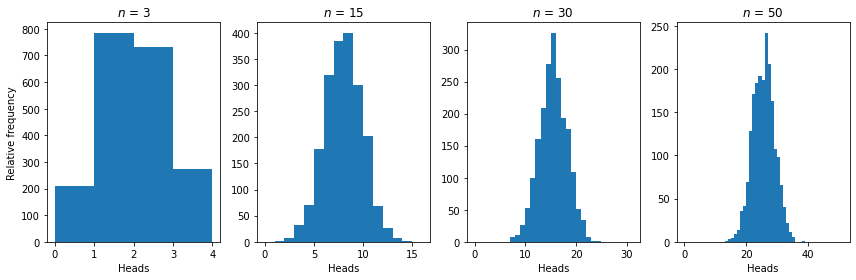

In [14]:
# Individual sample sizes to test
n = [3, 15, 30, 50]
# Fair coin, equal chance of heads and tails
p = 0.5
# Generate 2000 independent samples
s = 2000

# Data
# Access via dist = arr[sample_size_index], dist = [mean1, mean2, ... mean2000]
flip_distribution = [np.random.binomial(i, p, s) for i in n]

# We will reuse this later, so putting it in a function first


def plot_coin_flip_CLT(flip_distribution, n, normalize = False):
    fig, ax = plt.subplots(ncols=len(n), figsize=(3*len(n), 4))

    # Making good histograms
    for i, dist in enumerate(flip_distribution):
        min_value = min(dist)
        max_value = max(dist)

        # Max ensures that step sizes in the following histogram are at least 1, but otherwise such that there will be around 30 bins
        step_size = max((max_value-min_value)//30, 1)
        # n+2 ensures the outcome with all heads is also captured.
        bin_range = range(0, n[i]+2, step_size)

        # Plot histogram and customize
        ax[i].hist(dist, bins=bin_range, density=normalize)
        ax[i].set_xlabel('Heads')
        ax[i].set_title(f'$n$ = {n[i]}')
    # Common y axis label
    if normalize:
        ax[0].set_ylabel('Counts')
    else:
        ax[0].set_ylabel('Relative frequency')

    return fig, ax


plot_coin_flip_CLT(flip_distribution, n)
plt.tight_layout()
plt.show()

Restating CLT from above, we can quite clearly observe that:
> The *distribution of sample means* approximates a normal distribution *as the sample size gets larger*, even if the population is not normally distributed.

* In particular, the 'distribution of population' here is the distribution of the probability of the outcomes of coin flip - 0.5 for heads and tails, certainly not normally distributed.

### Additional Conditions
In practice, we impose some further conditions before using CLT, to account for more extreme probability distribution functions. We will summarise the conditions necessary for CLT to hold true:

* The data must be sampled randomly from the population by using a probability sampling method.
* Each of the sample values must be independent of each other. That is, the occurrence of one event does not affect the occurrence of any other event.
* When the sample is drawn without replacement, the sample size must be no larger than 10% of the total population.
* Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

If all these conditions are fulfilled, then, by the central limit theorem, the sampling distribution obtained will represent a normal distribution, regardless whether the variable actually follows a normal distribution in the population. (eg. In Asia, people's heights are skewed towards the shorter end.)

### Direct Application
We can now easily control the conditions of sampling to generate a normal distribution. To turn CLT into a useful tool, we need to establish a link between the sample statistics and population statistics.

#### Population statistics
The mean and variance of a single flip of a fair coin is respectively given by:
$$\mu = 0.5\cdot0 + 0.5\cdot1 = 0.5$$
$$\sigma^2 = 0.5\cdot(1-0.5)^2 + 0.5\cdot(0-0.5)^2 = 0.25$$

#### Expectation value
Scaling this up to $n$ independent coin flips, we *expect* the subseuqent distribution to have both mean and variance scaled up by $n$.
* *The mathematical derivation is beyond the scope of this project.*

Let $X$ represent the distribution of number of heads (i.e. what we have been plotting), then,
$$E(\bar{X}) = n\mu$$
where $\bar{X}$ is mean number of heads, and $\mu$ is the expected number of heads for a flip.
$$E(Var(X))=n\sigma^2$$
where $Var(X)$ is the variance of the number of heads, and $\sigma^2$ is the expected variance in the number of heads per flip.

#### Utility
This also means that if we did not know the population mean and variance (for example, if we **did not know** that the coin is fair, and this is true in the applications of CLT), our best guess for the mean and variance would then be
$$\mu=\bar{X}/n$$
$$\sigma^2 = Var(X)/n$$

Therefore, in the following section we will do the following:
 
1. Compare the **expected** distribution (normal distribution) against the actual data, and show a good agreement for high $n$ values.
   * The expected distribution is normal, with $(\mu,\sigma^2)=(0.5n,0.25n)$
   * In a normal curve, a higher mean corresponds to a curve shifted to right along the x-axis, and a higher variance corresponds to a wider curve.
   * We use ```scipy.stats.norm``` to obtain this normal curve.
2. Estimate the true mean and variance of the coin from the observed distributions.

Note that we have also normalized the graph so that the y-axis now represents the relative frequency, which corresponds to the relative probability of getting a sample mean within the specified bin.

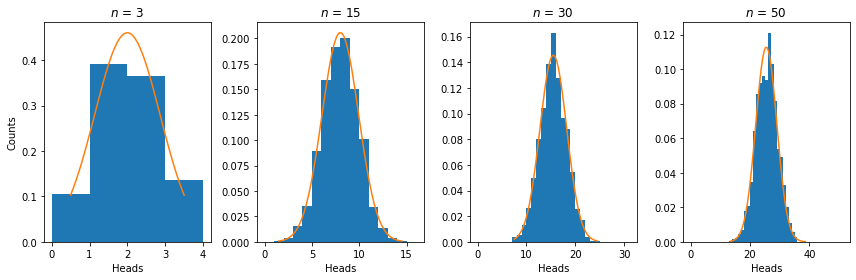

Best estimates
n=3 : μ=mean/n=0.51, σ^2=var/n=0.24
n=15: μ=mean/n=0.50, σ^2=var/n=0.25
n=30: μ=mean/n=0.50, σ^2=var/n=0.25
n=50: μ=mean/n=0.50, σ^2=var/n=0.26


In [15]:
def get_normal_points(mean=0,var=1,x_min=0,x_max=1):
    x = np.linspace(x_min,x_max,endpoint=True)
    # norm takes in mean,std
    y = norm(mean,var**0.5).pdf(x)
    return x,y

# Plotting the same plots again, but this time we superimpose the normal curve to see the fit
fig, ax = plot_coin_flip_CLT(flip_distribution, n, True)

for i, dist in enumerate(flip_distribution):
    x,y = get_normal_points(0.5*n[i],0.25*n[i],min(dist),max(dist))
    # +0.5 is to offset, observe that for i heads it will be plotted between i and i+1 when there are only 3 bins
    # Thus the normal curve should be plotted on i+0.5
    # This is only an issue for n=3 case, when there are sufficient bins, the offset is negligible
    ax[i].plot(x+0.5,y)

plt.tight_layout()
plt.show()    

# Print the estimations
print('Best estimates')
for i, dist in enumerate(flip_distribution):
    print(f'n={n[i]:<2}: μ=mean/n={np.mean(dist)/n[i]:.2f}, σ^2=var/n={np.var(dist)/n[i]:.2f}')

We see a close agreement between the best estimate and theoretical mean and variance.

In the following section, we apply the same idea to a N-sided fair dice, though with a slight modification. For each sample, we take the **average** of the the rolls within that sample, this is in contrast to the coin flip example, where we took the **total** (i.e. *sum*) of the number of heads.
* By taking the average, we restrict the possible sample values to the range $1$ to $n$, making it independent of sample size.

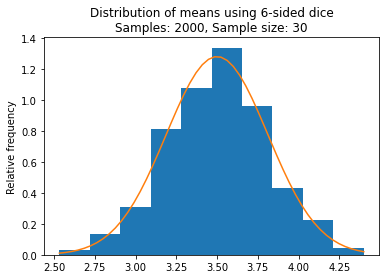

In [16]:

def plot_N_sided_dice(sides = 6, size = 30, samples = 2000):
    # Theoretical mean and variance
    mean_theory = np.mean(range(1,sides+1))
    var_theory = np.var(range(1,sides+1))/size

    # List of sample means (sample size as specified) of n-sided dice rolls
    dice_mean_dist =  [np.mean(np.random.randint(1, sides+1, size)) for _ in range(samples)]
    
    # Getting points for normal graph
    x,y = get_normal_points(mean_theory,var_theory,min(dice_mean_dist),max(dice_mean_dist))
    
    plt.hist(dice_mean_dist,density=True)

    # Not doing the offset, low sample sizes should not be used, especially after CLT was just demonstrated
    plt.plot(x,y)
    plt.title(f'Distribution of means using {sides}-sided dice\nSamples: {samples}, Sample size: {size}')
    plt.ylabel('Relative frequency')
    plt.show()

plot_N_sided_dice()

The theoretical normal distribution is superimposed as a qualitative gauge for how well it fits. Feel free run the above cell with different number of sides, and various sample sizes, and check for yourself that the subsequent distribution tends towards normal when sample size is at least 30.

### Limitations
Nonetheless, CLT only works when the original distribution has a **well-defined (i.e. finite) mean and variance**. For all finite discrete probability distribution functions, such as dice roll or the coin flip, it is always possible to directly compute a finite mean and variance.
* CLT works for all finite discrete probability distribution functions.

However, this may not be true when moving into a continuous distribution function. Here, we draw samples from a pareto distribution, using a process similar to binomial, but with ```numpy.random.pareto``` instead. Much like how the binomial distribution is characterised by the probability $p$, the pareto distribution is characterised by the parameter $a$. Here are some known characteristics for various $a$ values.

* When $a \le 1$, the distribution has an infinite mean.
* When $a \le 2$, the distribution has an infinite variance.

Hence, when $a \le 2$, we expect CLT to *fail*, and when $a > 2$, we expect CLT to succeed. In the following section, we test this idea using $a=1,1.5,4$, and observe how it looks like when CLT fails.

a = 1


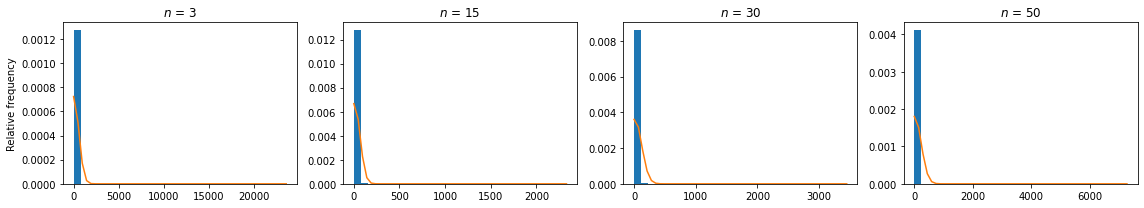

a = 1.5


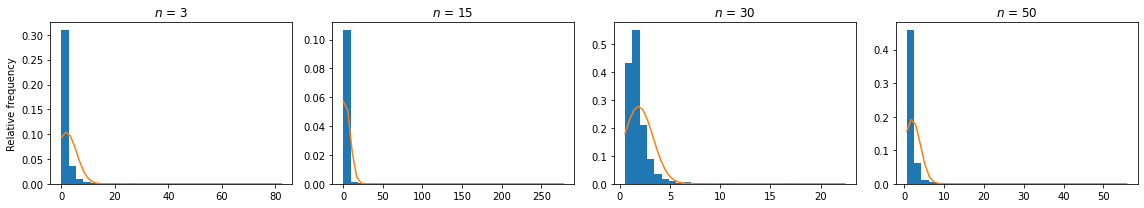

a = 5


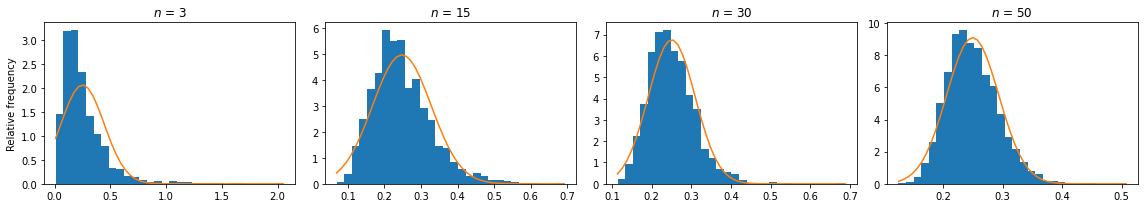

In [30]:
# Individual sample sizes to test
n = [3, 15, 30, 50]
# Indiviudal a values to test
a = [1, 1.5, 5]

# Generate 2000 independent samples
s = 2000


def pareto_mean(a, size):
    return np.mean(np.random.pareto(a, size))


def plot_pareto(result):

    fig, ax = plt.subplots(ncols=len(n), figsize=(4*len(n), 3))

    for i, dist in enumerate(result):
        # Plot histogram and customize
        ax[i].hist(dist, bins=30, density=True)
        ax[i].set_title(f'$n$ = {n[i]}')
    ax[0].set_ylabel('Relative frequency')
    return fig, ax


# For each a, generate 2000 samples for each sample size
for a_val in a:
    print(f'a = {a_val}')
    pareto_data = [[pareto_mean(a_val, size) for _ in range(s)] for size in n]
    fig,ax = plot_pareto(pareto_data)
    # Normal overlay using the sample statistics
    for i, dist in enumerate(pareto_data):
        x, y = get_normal_points(np.mean(dist), np.var(
            dist), np.min(dist), np.max(dist))
        ax[i].plot(x, y)
    plt.tight_layout()
    plt.show()


Indeed, we can observe that when $a \le 2$, the distribution of means does not converge to a normal distribution, regardless of the sample size.
* Since for some $a$ values there is no defined mean and variance, the normal distribution overlay instead uses the *sample* mean and variance.

For $a=5$, we observe a trend towards the normal distribution with increasing sample size, following the above discussions. Feel free to change the values of both $a$ and $n$ and observe how it changes the subsequent distribution!

## Part B: Demonstration
### Random Walk

Remember the coin flip example above? Flipping a fair coin is essentially the concept behind a **one-dimensional random walk**. By flipping a fair coin, we can decide the next step that an object at the origin along a linear axis moves. 
* At each step, the object can either move a distance of +1 (forward / *'head'*) or -1 (backwards / *'tail'*) with equal probability $p=0.5$. 
* When the object moves $n$ number of steps, assuming that the steps are independent and that $n$ is large enough, the probability distribution of the object's position approaches a Normal distribution, just like the coin example above!

In this section, we demonstrate that for a random walk in N-dimensions (ND), the distribution of final displacements, at sufficient large number of steps, follow the normal distribution for **every single dimension** in accordance to the CLT.
* We will be using ```np.random.choice``` to choose between $-1$ and $1$ to get the next position.
* Note that simulating N-dimensional random walks is equivalent to simulating N number of independent 1D random walks, and inputting them into arrays for each dimension.

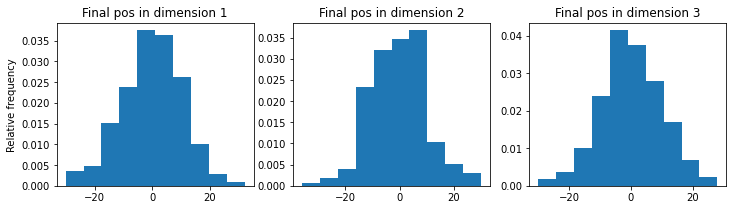

In [28]:
def next_pos(prev_pos,p=0.5):
    return prev_pos + np.random.choice([-1, 1],p=[1-p,p])


def random_walk_1D(steps=100):
    pos_list = [0]
    for _ in range(steps):
        pos_list.append(next_pos(pos_list[-1]))
    return np.array(pos_list)


def random_walk_ND(steps=100, n=2):
    # ND walk = N*1D walk -- independence across dimensions
    # Access via arr[dim,time]
    return np.array([random_walk_1D(steps) for _ in range(n)])


def ND_walk_displacement(steps=100, n=2, samples=1000):
    # Take specified samples, for each of them, take the position at last step of each dimension
    # Access via arr[sample,dim]
    return np.array([random_walk_ND(steps, n)[:, -1] for _ in range(samples)])


# Data
n = 3
ND_walk_pos = ND_walk_displacement(n=n, samples=500)

# Plot ND distribution
fig, ax = plt.subplots(ncols=n, figsize=(4*n, 3))
for i in range(n):
    ax[i].hist(ND_walk_pos[:, i],density=True)
    ax[i].set_title(f'Final pos in dimension {i+1}')

# Customize and show
ax[0].set_ylabel('Relative frequency')

plt.show()

Using the ```random_walk_ND``` function we derived above, we are able to simulate an animated 2D and 3D random walk. This visual representation shows each *discrete* step taken by the object being random in any dimension, thereby making it perhaps more intuitive to understand the following section, where we will explain how random walk is an approximation of Brownian motion, and conversely, Brownian motion is the limit of random walk!

### Animations of a 2D Random Walk

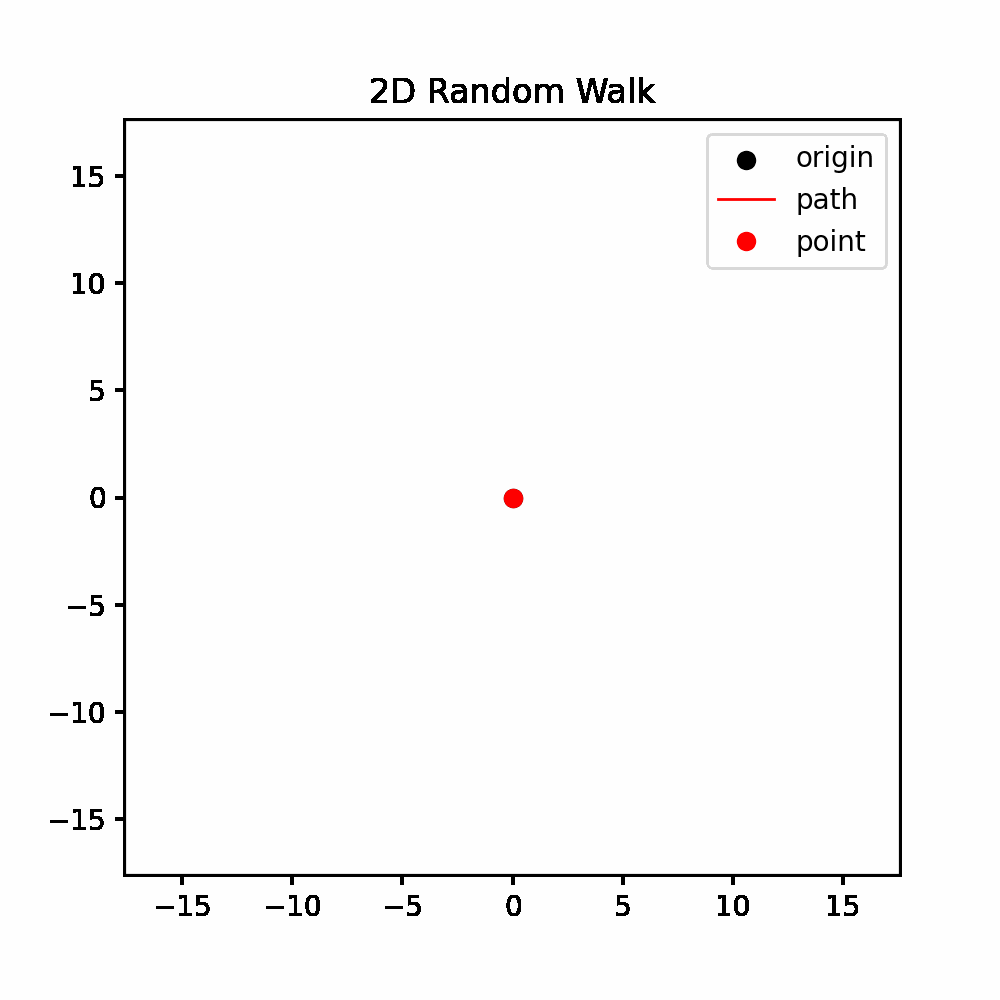

In [31]:
# Data
# Creating a 2D random walk
steps = 100
walked_2D_pos = random_walk_ND(steps, n=2)
# Split into x and y dimensions
x, y = walked_2D_pos

# Initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# Place the origin for reference
ax.scatter([0], [0], color='black', label='origin')

# The main plot will change throughout animation, so we create a container for it.
line1, = ax.plot([], [], '-r', label='path', lw=1)
point1, = ax.plot([], [], 'or', label='point')

# Customize
ax.legend(loc='upper right')
ax.set_title('2D Random Walk')

# Use the maximum displacement across x and y throughout the run to define our bounds for the plot
bound = np.max(np.abs(walked_2D_pos))*1.1
ax.set(xlim=(-bound, bound), ylim=(-bound, bound))

# Animate Frame for 2D
def animate_frame_2D(i):
    '''
    Defines what the i-th frame of animation should have.

    Parameters
    ----------
    i: Specifies the frame of animation

    Returns
    -------
    List of plot elements that need to be updated
    '''
    # Line from 0 to i-th (inclusive) data point, and a point for the i-th data point
    line1.set_data(x[:i+1], y[:i+1])
    point1.set_data(x[i], y[i])

    return line1, point1


# blit=True optimizes the graphing process by only redrawing the changes.
# It does so using the return values of animate.
# Therefore, animate_frame returns the list of objects need updating.
ani = FuncAnimation(fig, animate_frame_2D, blit=True, frames=steps)

# In particular, gifs outputs are not rendered for .ipynb, so saving and redirecting to output should be used instead.
ani.save("2D_walk.gif", writer=PillowWriter(fps=25), dpi=200)
# Suppress the static image
plt.close()

# Show saved gif
Image(filename="2D_walk.gif")


### Animation of a 3D Random Walk

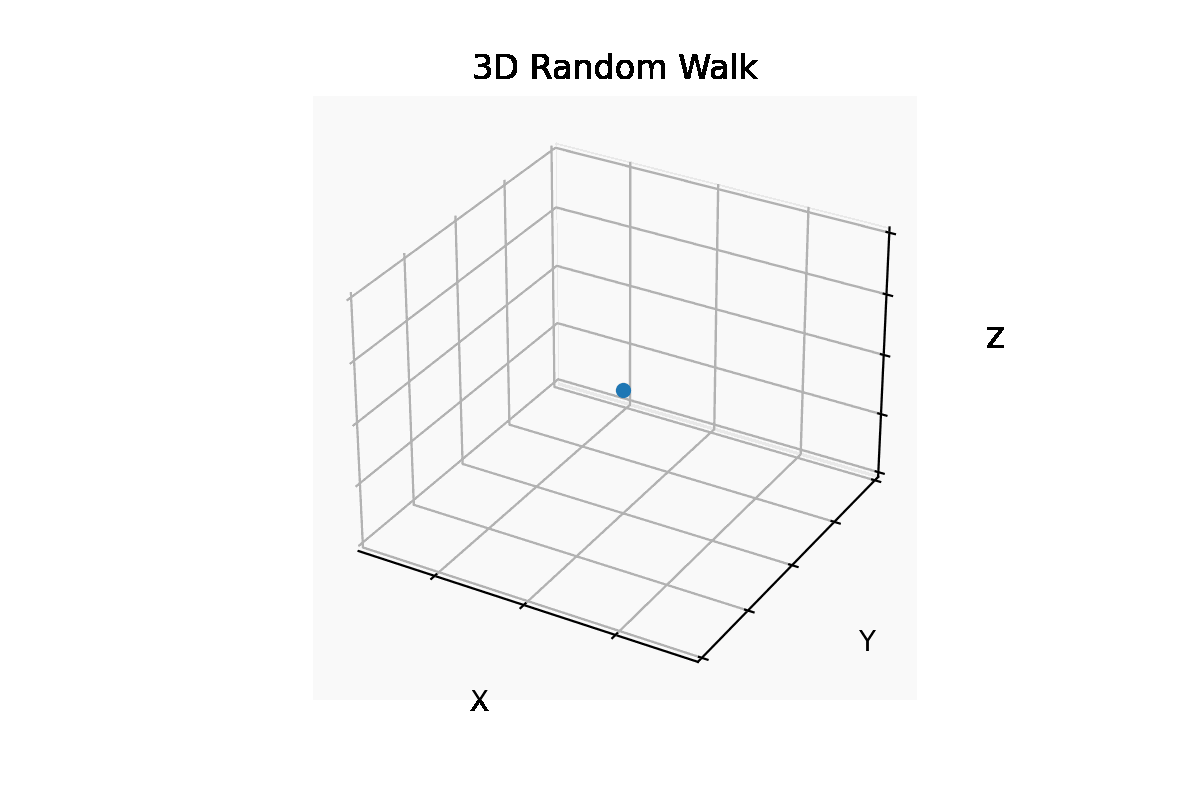

In [10]:
# Data
# Creating a 3D random walk
steps = 100
walked_3D_pos = random_walk_ND(steps, n=3)
# Split into x,y,z dimensions
x, y, z = walked_3D_pos

# Initialize plot
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Place the origin for reference
ax.scatter([0], [0], [0], color='black', label='origin')

# The main plot will change throughout animation, so create a container for it
line1, = ax.plot([], [], [], label='path', lw=1)

# Customize
ax.set_title('3D Random Walk')
# Bounds
# Use the maximum displacement across x, y and z throughout the run to define our bounds for the plot
bound = np.max(np.abs(walked_3D_pos))*1.1
ax.set(xlim3d=(-bound, bound), ylim3d=(-bound, bound), zlim3d=(-bound, bound))

ax.set(xlabel='x', ylabel='y', zlabel='z')
ax.set(xticklabels=[], yticklabels=[], zticklabels=[])

# Animate Frame for 3D
def animate_frame_3D(i):
    '''
    Defines what the i-th frame of animation should have.

    Parameters
    ----------
    i: Specifies the frame of animation

    Returns
    -------
    List of plot elements that need to be updated
    '''
    # Line from 0 to i-th (inclusive) data point, and a point for the i-th data point
    line1.set_data(x[:i+1], y[:i+1])
    line1.set_3d_properties(z[:i+1])
    return line1

# blit=True optimizes the graphing process by only redrawing the changes.
# It does so using the return values of animate.
# Therefore, animate_frame returns the list of objects need updating.
ani = FuncAnimation(fig, animate_frame_3D, frames=steps)

# In particular, gifs outputs are not rendered for .ipynb, so saving and redirecting to output should be used instead.
ani.save("3D_walk.gif", writer=PillowWriter(fps=22), dpi=200)
# Suppress the static image
plt.close()

# Show saved gif
Image(filename="3D_walk.gif")

### Brownian motion as a limit of random walk

Following from our discussion about random walks as an application of CLT, we now discuss a similar concept - Brownian motion. Brownian motion is first observed by biologist Robert Brown under the microscope, where *pollen grains moved in random motion suspended in water*. Albert Einstein later reasoned that the observed Brownian motion is due to the macroscopic particle (pollen grain) undergoing collisions with microscopic atoms, resulting in "random steps". Mathematicians tried to construct a function to describe the Brownian motion, until Norbert Wiener came up with the rigorous mathematical model of Brownian motion that is called the **Wiener process**. 

In fact, the random walk is an approximation of Brownian motion, and the approximation becomes closer when the displacement of each step becomes smaller. In other words,
> Brownian motion is a continuous-space and -time stochastic process, while a random walk is a discrete-space and -time model. 

Since real motion is continuous, we want to try to make random walk continuous by appropriate scaling:
* Consider that in $t$ seconds, we take $n$ independent steps, each step has length $d$ $(p=0.5$ of $±d)$
  * Equivalently, we take a step every $\delta t = t/n$ seconds.
  * n should be really large (>> 30)
  * By CLT, **distribution of displacement after t seconds is normal** with (mean,var) = $(0, n d^2) = (0,(t/\delta t) d^2)$
    
  * *Recall that:* 
    * mean = $0.5(d) + 0.5(-d) = 0$
    * var (each) = $0.5*(-d)^2 + 0.5*(d)^2 = d^2$ -> $nd^2$ for $n$ steps
* For convenience, we choose d = sqrt($\delta t$).
  * In particular, for the time interval $t$, the distribution is normal with (mean,var) = (0, t)
  
This is precisely the Wiener process, W(t) = N(0,t), **where the normality is ensured by CLT**. 
  * Here, the amount of diffusion depends on $t$ only, independent of past events
  * The diffusion between any time interval between $t_1$ and $t_2$ is also normal, $W(t_2) - W(t_1) = N(0,(t_2-t_1))$

Duration = 3 s
Expected distribution: N(0,3)


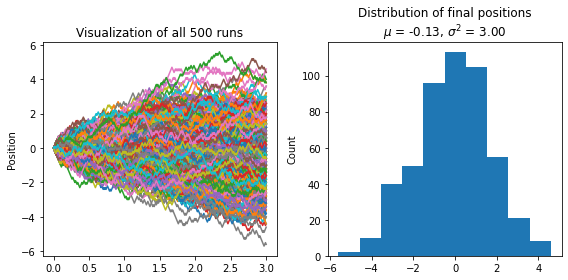

Duration = 5 s
Expected distribution: N(0,5)


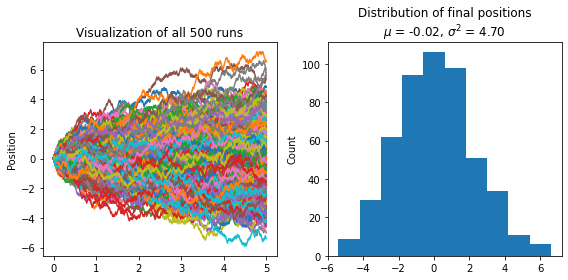

Duration = 10 s
Expected distribution: N(0,10)


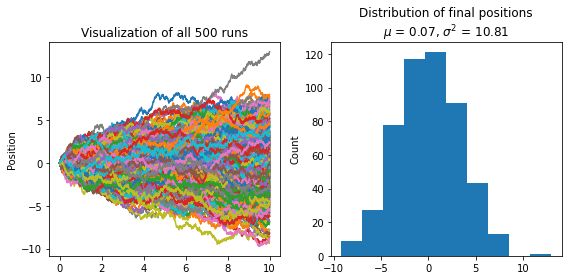

In [11]:
def wiener_process_time(steps_per_second=100,duration=5):
    # We need an additional array to map the i-th position entry to a time for plotting
    return np.linspace(0,duration,endpoint=True,num=steps_per_second*duration+1)

def single_wiener_process(steps_per_second=100,duration=5):
    # It's just a scaled random walk
    return random_walk_1D(steps_per_second*duration)/steps_per_second**0.5

def multi_wiener_process(steps_per_second=100,duration=5,runs=500):
    return np.array([single_wiener_process(steps_per_second,duration) for _ in range(runs)],dtype=object)

def plot_wiener_process(time, result):
    fig, ax = plt.subplots(ncols =2, figsize=(8,4))
    
    # Plot runs
    for run in result:
        ax[0].plot(time,run)
    
    final_pos = result[:,-1] 

    # Plot distribution of final position
    ax[1].hist(final_pos)

    # Customize
    ax[0].set_ylabel('Position')
    ax[1].set_ylabel('Count')
    
    ax[0].set_title(f'Visualization of all {len(result)} runs')
    ax[1].set_title(f'Distribution of final positions\n$\mu$ = {np.mean(final_pos):.2f}, $\sigma^2$ = {np.var(final_pos):.2f}')

    plt.tight_layout()
    plt.show()

for d in [3,5,10]:
    print(f'Duration = {d} s')
    print(f'Expected distribution: N(0,{d})')
    plot_wiener_process(wiener_process_time(duration=d),multi_wiener_process(duration=d))

## Gambler's Ruin Problem

Consider a gambler who starts with \$i. 

On each successive gamble, he either wins \\$ 1 with a probability of $p$, or loses \\$1 with a probability of $(1−p)$, independent of the past.

The game ends when:
- The gambler earns his desired amount of $\$N$ ($0 < i < n$) and wins, or
- The gambler goes broke, i.e., is ruined,

whichever happens first.

Let us define some terms:
- $R_n$ - Total fortune after the $n^{th}$ gamble. (0 < i < N)
- $P_i$ - Probability that the gambler wins when $R_0 = i$.
- $\mu_i$ - Expected number of plays until the game ends, starting from $i$

We can explore this scenario by modelling the system with random walks of step length step length +1 (with probability $p$) or -1 (with a propability $(1-p)$). For each case, we will simulate a specified number of runs and plot the distributions of the outcomes.  

**Case 1: Fair Game ($p = 0.5$)**

It can be proven that:
- $P_i = \dfrac{i}{N}$
- $\mu_i = i(N-i)$

**Case 2: Unfavourable Odds ($p\neq q$)**

It can be proven that: ($r=\dfrac{1-p}{p}$)
- $P_i = \dfrac{1-r^i}{1-r^N}$
- $\mu_i = \dfrac{r+1}{r-1}(i-\dfrac{N(1-r^i)}{1-r^N})$

We can also prove that, if a player plays until he goes broke (i.e., as $N$ approaches infinity):
- If $p>0.5$, there is a nonzero probability that the player will become infinitely rich.
- If $p\le0.5$, the player will definitely go broke. In other words, a gambler playing a game with negative expected value will eventually be ruined.


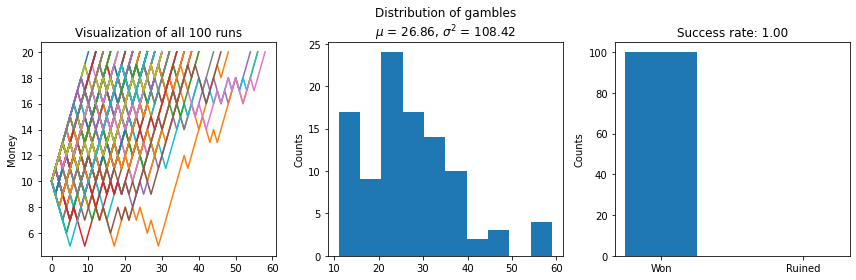

In [12]:
def single_gambler_ruin(i=10,N=20,p=0.5):
    fortune_list = [i]
    while True:
        # Reusing random walk code!
        fortune_list.append(next_pos(fortune_list[-1],p))
        if fortune_list[-1] == 0 or fortune_list[-1] == N:
            return np.array(fortune_list)

def multi_gambler_ruin(i=10,N=20,p=0.5,runs=100):
    # Access via pot_n = arr[run,n]
    return np.array([single_gambler_ruin(i,N,p) for _ in range(runs)],dtype=object)

def plot_gambler_ruin(result):
    fig, ax = plt.subplots(ncols =3, figsize=(12,4))
    
    # Plot runs, and also count number of losses and wins
    loss, win = 0,0
    for run in result:
        ax[0].plot(run)
        if run[-1] == 0:
            loss += 1
        else:
            win += 1
    
    # Plot time taken
    run_lengths = [len(run) for run in result]
    ax[1].hist(run_lengths)

    # Plot wins vs loss
    ax[2].bar(("Won","Ruined"),(win, loss), width = 0.5)
    
    # Customize
    ax[0].set_ylabel('Money')
    ax[1].set_ylabel('Counts')
    ax[2].set_ylabel('Counts')

    ax[0].set_title(f'Visualization of all {len(result)} runs')
    ax[1].set_title(f'Distribution of gambles\n$\mu$ = {np.mean(run_lengths):.2f}, $\sigma^2$ = {np.var(run_lengths):.2f}')
    ax[2].set_title(f'Success rate: {win/(loss+win):.2f}')
    
    plt.tight_layout()
    plt.show()

plot_gambler_ruin(multi_gambler_ruin(p=0.7,runs=100))

# TODO: Think if this is really adds value -- connect to CLT..?
#     if p == 0.5:
#         print("Expected probability of wins = ", i/N)
#         print("Expected number of plays = ", i*(N-i))
    
#     else:
#         r = (1-p)/p
#         print("Expected probability of wins = ", (1-r**i)/(1-r**N))
#         print("Expected number of plays = ", ((r+1)/(r-1))*(i-(N*(1-r**i))/(1-r**N)))

#     print("Probability of wins in simulation = ", number_of_wins/number_of_runs)
#     print("Average number of plays in simulation = ", np.average(number_of_plays))



p=0.54


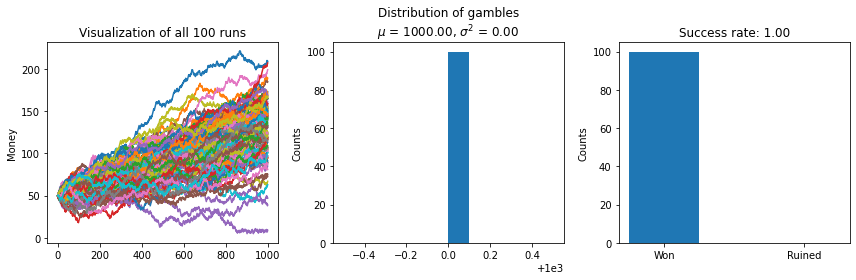

p=0.52


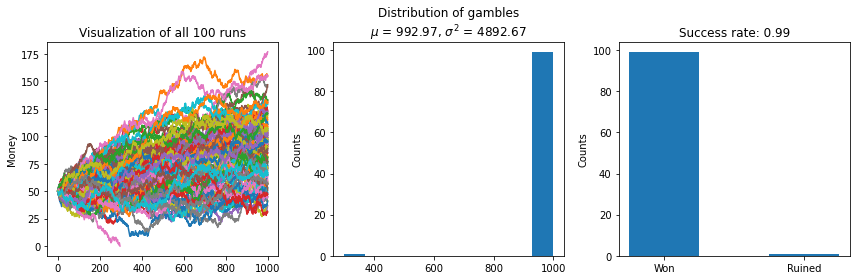

p=0.5


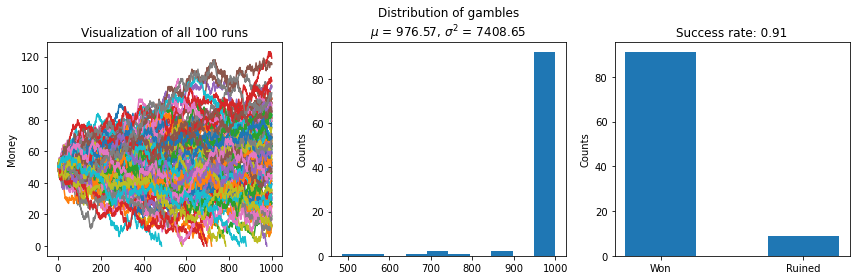

p=0.48


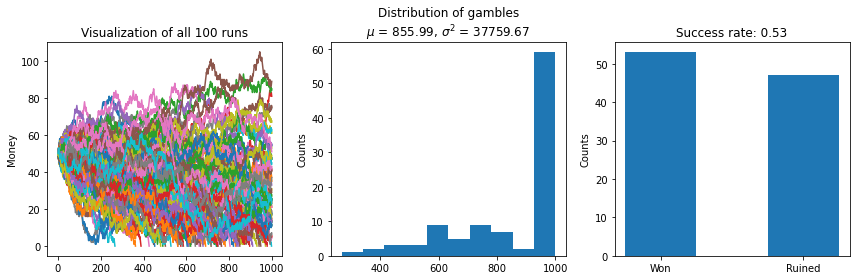

p=0.46


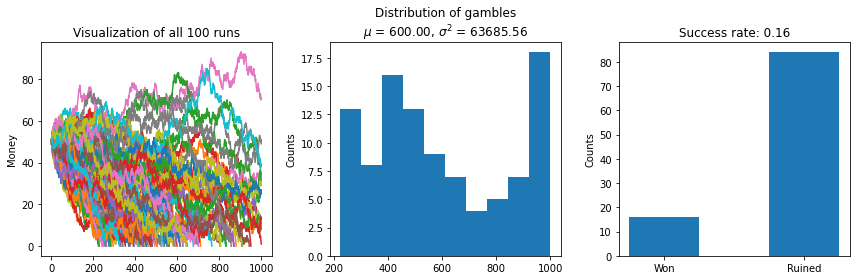

In [13]:
def single_gambler_ruin_infinite(i=10,p=0.5,max_step=1000):
    # Highly similar to finite version, except modified exit condition
    fortune_list = [i]
    while len(fortune_list) < max_step:
        # Reusing random walk code!
        fortune_list.append(next_pos(fortune_list[-1],p))
        if fortune_list[-1] == 0:
            break
    return np.array(fortune_list)

def gamblers_ruin_infinite(i=50, p=0.7, runs=100, max_step=1000):
    return np.array([single_gambler_ruin_infinite(i,p,max_step) for _ in range(runs)],dtype=object)

for p in [0.54,0.52,0.5,0.48,0.46]:
    print(f'p={p}')
    plot_gambler_ruin(gamblers_ruin_infinite(p=p))


## References
1. https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading6b.pdf
2. http://astro.pas.rochester.edu/~aquillen/phy256/lectures/Diffusion_walks.pdf
3. https://www.stat.cmu.edu/~cshalizi/754/notes/lecture-16.pdf
4. https://towardsdatascience.com/central-limit-theorem-a-real-life-application-f638657686e1
5. https://web.stanford.edu/class/archive/cs/cs109/cs109.1214/lectures/18-CentralLimitTheorem/18-CentralLimitTheorem.pdf
6. https://www.probabilitycourse.com/chapter11/11_4_1_brownian_motion_as_the_limit_of_a_symmetric_random_walk.php
7. https://cims.nyu.edu/~holmes/teaching/asa19/handout_Lecture6_2019.pdf
8. https://galton.uchicago.edu/~lalley/Courses/313/BrownianMotionCurrent.pdf
9. http://www.columbia.edu/~ks20/FE-Notes/4700-07-Notes-GR.pdf
10. https://www.youtube.com/watch?v=Ne2lmAZI4-I
11. https://web.mit.edu/neboat/Public/6.042/randomwalks.pdf
12. https://www.academia.edu/18573894/Variance_of_the_game_duration_in_the_gambler_s_ruin_problem 